
# Loan Prediction Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). 

This is a model that will help predict people with a profile of having a high probability of paying you back.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.
The csv provided is cleaned of NA values.


# Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loans = pd.read_csv('loan_data.csv')

Info on our data:

In [3]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

# Exploratory Data Analysis


Histogram of two FICO distributions on top of each other, one for each credit.policy outcome.



Text(0.5,0,'FICO')

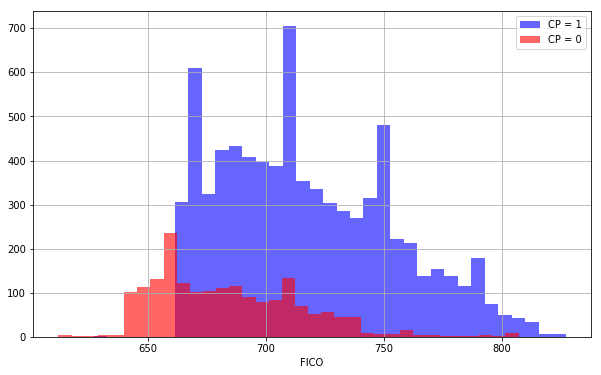

In [6]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(bins=35, color='blue', label='CP = 1', alpha=0.6)
loans[loans['credit.policy']==0]['fico'].hist(bins=35, color='red', label='CP = 0', alpha=0.6)
plt.legend()
plt.xlabel('FICO')

Selected by the not.fully.paid column.

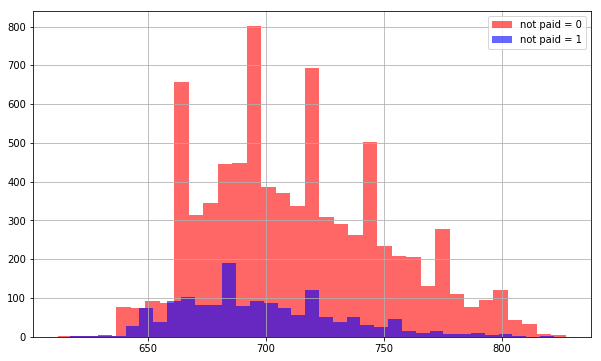

In [7]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==0]['fico'].hist( bins=35,
                                                  color='red', 
                                                  alpha=0.6, 
                                                  label = 'not paid = 0')
loans[loans['not.fully.paid']==1]['fico'].hist(bins=35,
                                                  color='blue',
                                                  alpha=0.6,
                                                  label='not paid = 1')
plt.legend()

Countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.

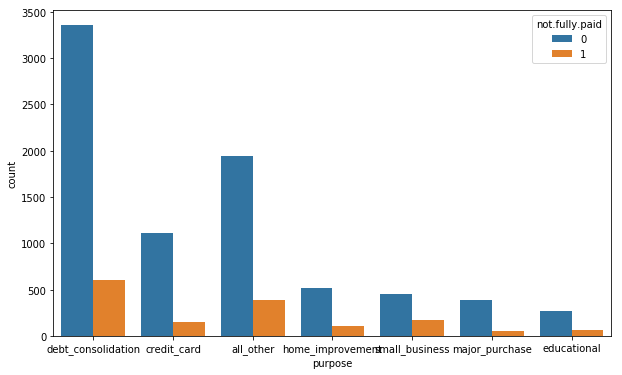

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose', data=loans, hue='not.fully.paid', )

Jointplot between FICO score and interest rate.

c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


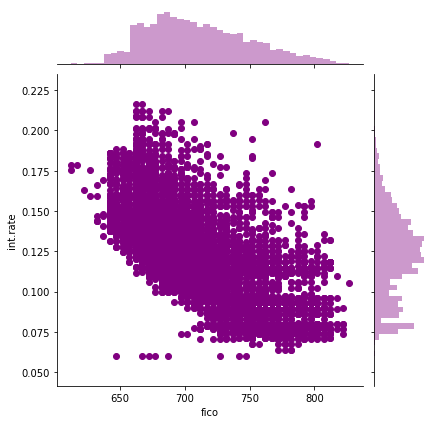

In [9]:
sns.jointplot(x='fico', y='int.rate', data=loans, color='purple')

Lmplots to see if the trend differed between not.fully.paid and credit.policy.

c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


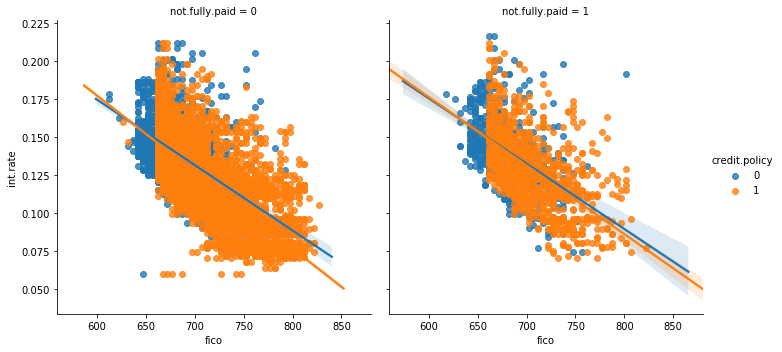

In [10]:

sns.lmplot(x='fico', y='int.rate', data=loans, hue='credit.policy',
           col='not.fully.paid')

# Setting up the Data


In [11]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1010.2+ KB


## Categorical Features

The purpose column is an object.

That means we need to transform them using dummy variables so sklearn will be able to understand them.

We will create a list object, so we can use it as a column when creating dummiy variables

In [12]:
cat_feats = ['purpose']

In [13]:
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)

In [14]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

## Train Test Split



In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X =final_data.drop('not.fully.paid', axis=1)
y= final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=101)

## Training a Decision Tree Model


In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dtree = DecisionTreeClassifier()

In [19]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predictions and Evaluation of Decision Tree

In [20]:
pred = dtree.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[1999  432]
 [ 342  101]]


             precision    recall  f1-score   support

          0       0.85      0.82      0.84      2431
          1       0.19      0.23      0.21       443

avg / total       0.75      0.73      0.74      2874



We can see here that our model is fairly good, but there is room for improvment

## Training the Random Forest model



In [23]:
from sklearn.ensemble import RandomForestClassifier

c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [24]:
rfc = RandomForestClassifier(n_estimators=300)

In [25]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predictions and Evaluation



In [30]:
r_pred = rfc.predict(X_test)

In [31]:
print(confusion_matrix(y_test, r_pred))
print('\n')
print(classification_report(y_test, r_pred))

[[2422    9]
 [ 432   11]]


             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.55      0.02      0.05       443

avg / total       0.80      0.85      0.78      2874



We now have better results by tweaking our model